Practice exercises and activities based on the book "Interactive Data Visualization with Python: Present your data as an effective and compelling story," 2nd Edition

Book link: https://www.amazon.com/Interactive-Data-Visualization-Python-compelling/dp/1800200943

Date: September 2021

Author: Steven Ponce


# Chapter 1: Basic & Customized Plotting


In [1]:
# Load libraries
import sys
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

print('You\'re running python %s' % sys.version.split(' ')[0])


You're running python 3.8.3


In [2]:
# Loading the data
diamonds_df = sns.load_dataset('diamonds')

print('Rows, Columns: ', diamonds_df.shape)
diamonds_df.head()

Rows, Columns:  (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# DF information
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
# DF that have the 'ideal' cut
diamonds_low_df = diamonds_df.loc[diamonds_df['cut'] == 'Ideal']

print('Rows, Columns: ', diamonds_low_df.shape)
diamonds_low_df.head()

Rows, Columns:  (21551, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78


In [5]:
# Lets add a new column (price_per_carat)
diamonds_df['price_per_carat'] = diamonds_df['price'] / diamonds_df['carat']

print('Rows, Columns: ', diamonds_df.shape)
diamonds_df.head()

Rows, Columns:  (53940, 11)


,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [6]:
# Lets add the column 'price_per_carat_is_high' based on the condition > 3500 as high (coded as 1), 
# and < 3500 as low (coded 0)
diamonds_df['price_per_carat_is_high'] = np.where(diamonds_df['price_per_carat'] > 3500, 1, 0)

print('Rows, Columns: ', diamonds_df.shape)
diamonds_df.head()

Rows, Columns:  (53940, 12)


,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,0


In [7]:
# apply a simple function to the 'price' column
diamonds_df['price'] = diamonds_df['price'] * 1.3

In [8]:
# apply a little more complex function to the 'price' column
# Ceil() is used to round up the values specified in it. It rounds up the value to the nearest greater integer.
diamonds_df['rounded_price'] = diamonds_df['price'].apply(math.ceil)

print('Rows, Columns: ', diamonds_df.shape)
diamonds_df.head()

Rows, Columns:  (53940, 13)


,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,rounded_price
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436


In [9]:
# lets apply a lambda function to round up to the nearest multiple of 100
diamonds_df['rounded_price_to_100multiple'] = diamonds_df['price'].apply(lambda x: math.ceil(x/100)*100)

print('Rows, Columns: ', diamonds_df.shape)
diamonds_df.head()

Rows, Columns:  (53940, 14)


,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,rounded_price,rounded_price_to_100multiple
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424,500
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424,500
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426,500
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435,500
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436,500


In [10]:
# another way to achieve the round up to round up to the nearest multiple of 100 is 
# by creating a user-function

def get_100_multiple_ceil(x):
    y = math.ceil(x/100)*100
    return y

In [11]:
# lets apply a function to a single column 'rounded_price_to_100multiple'
diamonds_df['rounded_price_to_100multiple'] = diamonds_df['price'].apply(get_100_multiple_ceil)

print('Rows, Columns: ', diamonds_df.shape)
diamonds_df.head()

Rows, Columns:  (53940, 14)


,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,rounded_price,rounded_price_to_100multiple
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424,500
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424,500
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426,500
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435,500
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436,500


In [12]:
# applying functions to multiple columns
''' Determine if a record x is desired or not'''

def is_desired(x):
    bool_var = 'yes' if (x['cut'] == 'Ideal' and x['color'] == 'D') else 'no'
    return bool_var


In [13]:
# lets create a new column 'desired' and apply the 'is_desired' function
diamonds_df['desired'] = diamonds_df.apply(is_desired, axis=1)

print('Rows, Columns: ', diamonds_df.shape)
diamonds_df.head()

Rows, Columns:  (53940, 15)


,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,rounded_price,rounded_price_to_100multiple,desired
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424,500,no
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424,500,no
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426,500,no
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435,500,no
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436,500,no


In [14]:
# Lets delete 'rounded_price' and 'rounded_price_to_100multiple' columns
diamonds_df = diamonds_df.drop(columns=['rounded_price', 'rounded_price_to_100multiple'])

print('Rows, Columns: ', diamonds_df.shape)
diamonds_df.head()

Rows, Columns:  (53940, 13)


,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,desired
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,no
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,no
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,no
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,no
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,no


In [15]:
# lets delete previous DF's from memory
del diamonds_df
del diamonds_low_df

In [16]:
# Loading the data
diamonds_df = sns.load_dataset('diamonds')

# writing a DF to a file 
diamonds_df.to_csv('diamonds_modified.csv', index=False)

print('Rows, Columns: ', diamonds_df.shape)
diamonds_df.head()

Rows, Columns:  (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


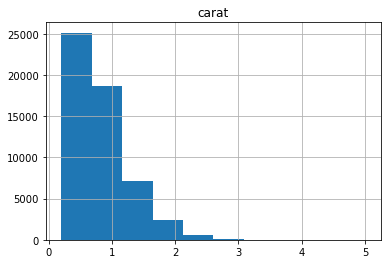

In [17]:
# Creating simple plots tpoo visualize a distribution of variables
diamonds_df.hist(column='carat');

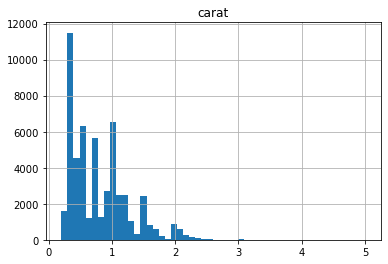

In [18]:
diamonds_df.hist(column='carat', bins=50);

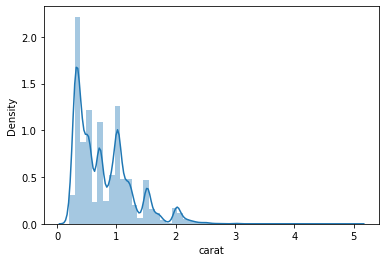

In [19]:
sns.distplot(diamonds_df.carat);

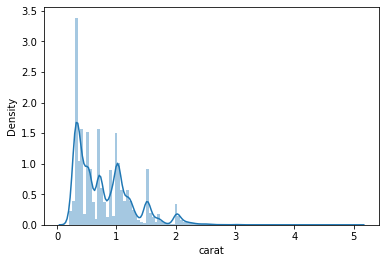

In [20]:
sns.distplot(diamonds_df.carat, bins=100);

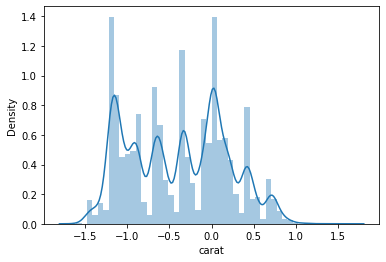

In [21]:
# using a log transformation on the 'carat' column
sns.distplot(np.log(diamonds_df.carat));

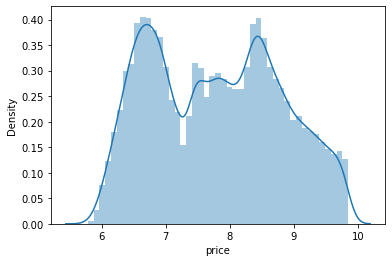

In [22]:
# using a log transformation on the 'price' column
sns.distplot(np.log(diamonds_df.price));

In [23]:
diamonds_df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [24]:
diamonds_df.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [25]:
# crosstab
cut_count_table =  pd.crosstab(index=diamonds_df['cut'], columns='count')
cut_count_table

col_0,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


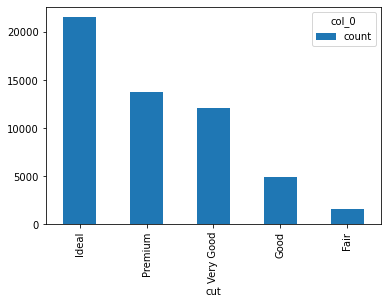

In [26]:
# bar plot
cut_count_table.plot(kind='bar');

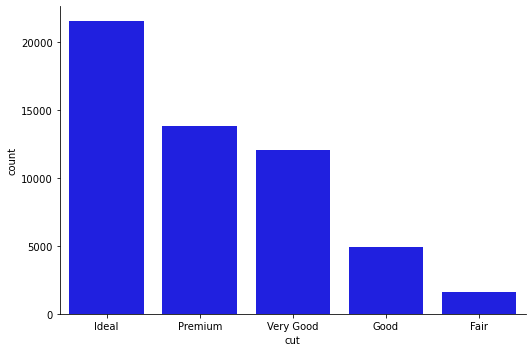

In [27]:
sns.catplot('cut', data=diamonds_df, kind='count', color='b', aspect=1.5);

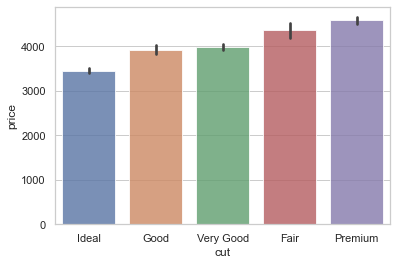

In [28]:
# price distribution with CI 95%
from numpy import median, mean

sns.set(style='whitegrid')
ax = sns.barplot(x='cut', y='price', data=diamonds_df, estimator=mean, 
                 alpha=0.8, ci=95, order=['Ideal', 'Good', 'Very Good', 'Fair', 'Premium']);

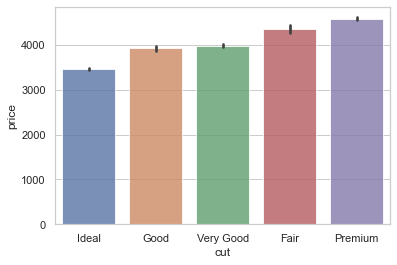

In [29]:
# price distribution with CI 68%

ax = sns.barplot(x='cut', y='price', data=diamonds_df, estimator=mean, 
                 alpha=0.8, ci=68, order=['Ideal', 'Good', 'Very Good', 'Fair', 'Premium']);

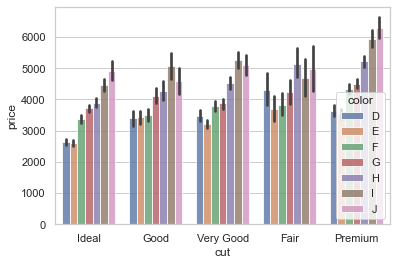

In [30]:
# hue
ax = sns.barplot(x='cut', y='price', data=diamonds_df, alpha=0.8, hue='color',
                order=['Ideal', 'Good', 'Very Good', 'Fair', 'Premium']);

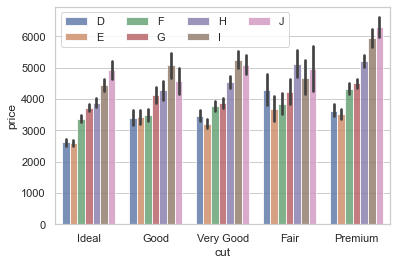

In [31]:
# legend
ax = sns.barplot(x='cut', y='price', data=diamonds_df, alpha=0.8, hue='color',
                order=['Ideal', 'Good', 'Very Good', 'Fair', 'Premium'])

ax.legend(loc='best', ncol=4);

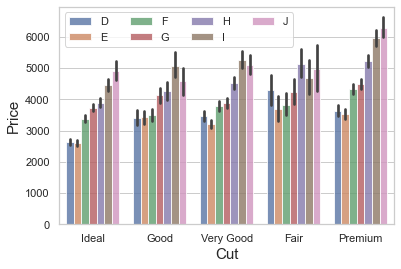

In [32]:
# axis
ax = sns.barplot(x='cut', y='price', data=diamonds_df, alpha=0.8, hue='color',
                order=['Ideal', 'Good', 'Very Good', 'Fair', 'Premium'])

ax.legend(loc='best', ncol=4)
ax.set_xlabel('Cut', fontdict={'fontsize' : 15})
ax.set_ylabel('Price', fontdict={'fontsize' : 15});

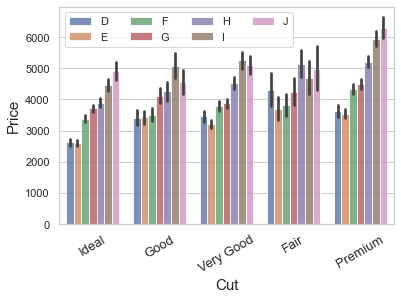

In [33]:
# ticks
ax = sns.barplot(x='cut', y='price', data=diamonds_df, alpha=0.8, hue='color',
                order=['Ideal', 'Good', 'Very Good', 'Fair', 'Premium'])

ax.legend(loc='best', ncol=4)
ax.set_xlabel('Cut', fontdict={'fontsize' : 15})
ax.set_ylabel('Price', fontdict={'fontsize' : 15})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=30);

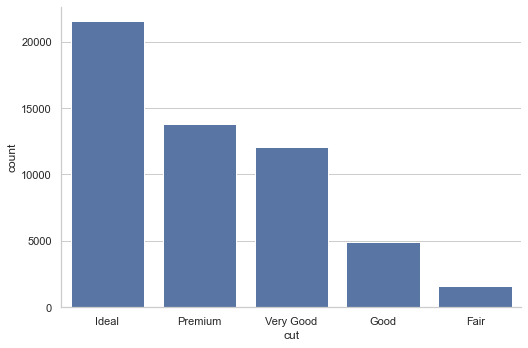

In [34]:
# annotations
sns.catplot('cut', data=diamonds_df, kind='count', color='b', aspect=1.5);

In [35]:
# get records corresponding to Ideal
ideal_group = diamonds_df.loc[diamonds_df['cut'] == 'Ideal']

In [36]:
# ge the location x
x = ideal_group.index.tolist()[0]

# ge the location y
y = len(ideal_group)

x,y

(0, 21551)

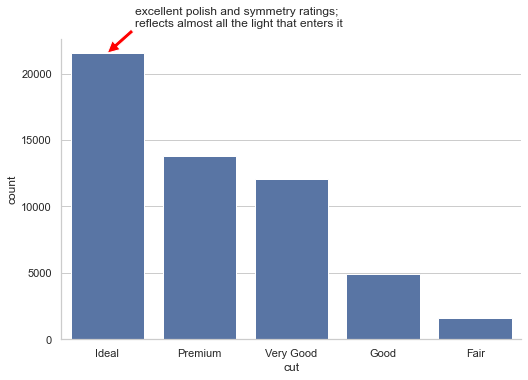

In [37]:
# annotation
sns.catplot('cut', data=diamonds_df, kind='count', color='b', aspect=1.5)

plt.annotate('excellent polish and symmetry ratings;\nreflects almost all the light that enters it',
            xy=(x,y), xytext=(x+0.3, y+2000),
            arrowprops=dict(facecolor='red'));

## Activity 1: 120 years of Olympic History

### Step 1 - download the dataset

In [38]:

''' 
download file 'athlete_events.csv' from course github repository: 
https://github.com/TrainingByPackt/Interactive-Data-Visualization-with-Python
''' 

# Loading the data
data = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/athlete_events.csv')
data.drop(columns=['ID'], axis=0, inplace=True)
data.tail()


ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

### Step 2 - filter the DF to only include medal winners from 2016

In [ ]:
data = data[(data.Year == 2016)]
data = data[data['Medal'].notna()] 
data.reset_index(inplace = True)

In [ ]:
'''
@author:  Steven Ponce   
Date:     Sep 2021 
'''

def quick_analysis(df):
       
    print('\n 1. Dataset Information:')
    print('-'*40)
    print(df.info()) 
    
    print('\n 2. Columns:', df.shape[1], 'Rows:', df.shape[0])   
    print('-'*40)

    print('\n 3. Null Values:')
    print('-'*40)
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(table)    
    
    return quick_analysis
    raise NotImplementedError()

In [ ]:
quick_analysis(data);

### Step 3 - medals awarded in 2016 for each sport

In [ ]:
data.Sport.value_counts()

### Step 4a - list the top-5 sports based on medals awarded in 2016.

In [ ]:
data.Sport.value_counts()[:5]

### Step 4b - filter the DF to only include the records of the top-5 in 2016

In [ ]:
top_5_sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey' ]

top_5_df = data[data['Sport'].isin(top_5_sports)]
top_5_df.reset_index(inplace = True)
top_5_df.drop(columns=['level_0', 'index'], axis=0, inplace=True)
top_5_df.tail()

### Step 5 - bar plot of record counts corresponding to each of the top-5 sports

In [ ]:
sns.set_theme(style="ticks")

g1 = sns.catplot(x='Sport',  
                data=top_5_df,
                kind='count', height=4, aspect=1.8, palette="Blues_r",alpha=0.9,
                order=['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']
                )


### Step 6 - histogram for the age feature of all medal winners in the top-5 sports

In [ ]:
plt.figure(figsize=(6,5))
g2 = sns.histplot(x='Age',
                  data=top_5_df,
                  palette="Blues_r",alpha=0.4, edgecolor="black", linewidth=1,
                  kde=True,
                  )
sns.despine(right=True)

In [ ]:
# Step 7 - bar plot indicating how many medals were won by each country's team in the top-5 sports in 2016
plot_order = top_5_df['Team'].value_counts().index

g3 = sns.catplot(x='Team',  
                data=top_5_df,
                kind='count', 
                height=6, 
                aspect=2.6, 
                palette="Dark2_r",alpha=1,
                order=plot_order
                )
g3.set_xticklabels(rotation=90);

In [ ]:
# Step 8 - bar plot indicating the average weight of players, categorized based on gender, 
# winning in the top-5 sports in 2016

In [ ]:
from numpy import mean

g4 = sns.catplot(x='Sport',
                 estimator=mean,
                 data=top_5_df,
                 kind='count', 
                 height=4, 
                 aspect=1.8, 
                 palette="Blues_r",alpha=0.9,
                 hue='Sex',
                 order=['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']
                )

In [ ]:
top_5_df.keys()